In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('../data/read_summarized_sales_clean.csv')
cci = pd.read_csv('../data/read_cci_clean.csv')
gdp = pd.read_csv('../data/read_gdp_sector_clean.csv')
rates = pd.read_csv('../data/read_fed_funds_rate_clean.csv')
jobs = pd.read_csv('../data/read_nonfarm_jobs_clean.csv')
fuel = pd.read_csv('../data/read_jet_fuel_clean.csv')
unemployment = pd.read_csv('../data/read_unemployment_rate_clean.csv')

**Revenue**

In [4]:
sales.head()
sales = sales[sales['Total Rev'] > 0]
sales = sales[sales['Year-Month'] != '2022-Nov']

In [5]:
month_rev = sales.groupby('Year-Month').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()
qtr_rev = sales.groupby('Year-Qtr').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()

In [6]:
month_rev.head()

,Year-Month,Total Rev,Order Count
0,2021-Apr,3266261.45,10084
1,2021-Aug,3580648.47,13212
2,2021-Dec,3984206.03,10111
3,2021-Feb,2062865.99,6178
4,2021-Jan,2343105.07,6795


In [7]:
qtr_rev.head()

,Year-Qtr,Total Rev,Order Count
0,2021-Q1,6811485.27,20045
1,2021-Q2,9221361.13,44365
2,2021-Q3,10458928.23,44271
3,2021-Q4,11128401.18,32324
4,2022-Q1,10491733.32,24038


**Consumer Confidence Index**

In [14]:
cci.head()

,Category,Year,Month,Year-Month,CCI
0,1/1/2021,2021,Jan,2021-Jan,99.25391
1,2/1/2021,2021,Feb,2021-Feb,99.39012
2,3/1/2021,2021,Mar,2021-Mar,99.74757
3,4/1/2021,2021,Apr,2021-Apr,99.98598
4,5/1/2021,2021,May,2021-May,99.92869


In [16]:
cci_rev = pd.merge(cci, month_rev, on = 'Year-Month')
cci_rev = cci_rev[['Year-Month','CCI', 'Total Rev', 'Order Count']]
cci_rev['Year-Month'] = pd.to_datetime(cci_rev['Year-Month'], format='%Y-%b')
cci_rev.head()

,Year-Month,CCI,Total Rev,Order Count
0,2021-01-01,99.25391,2343105.07,6795
1,2021-02-01,99.39012,2062865.99,6178
2,2021-03-01,99.74757,2405514.21,7072
3,2021-04-01,99.98598,3266261.45,10084
4,2021-05-01,99.92869,2799528.31,13608


In [18]:
cci_rev[['CCI', 'Total Rev']].corr()

,CCI,Total Rev
CCI,1.00000,-0.53718
Total Rev,-0.53718,1.00000


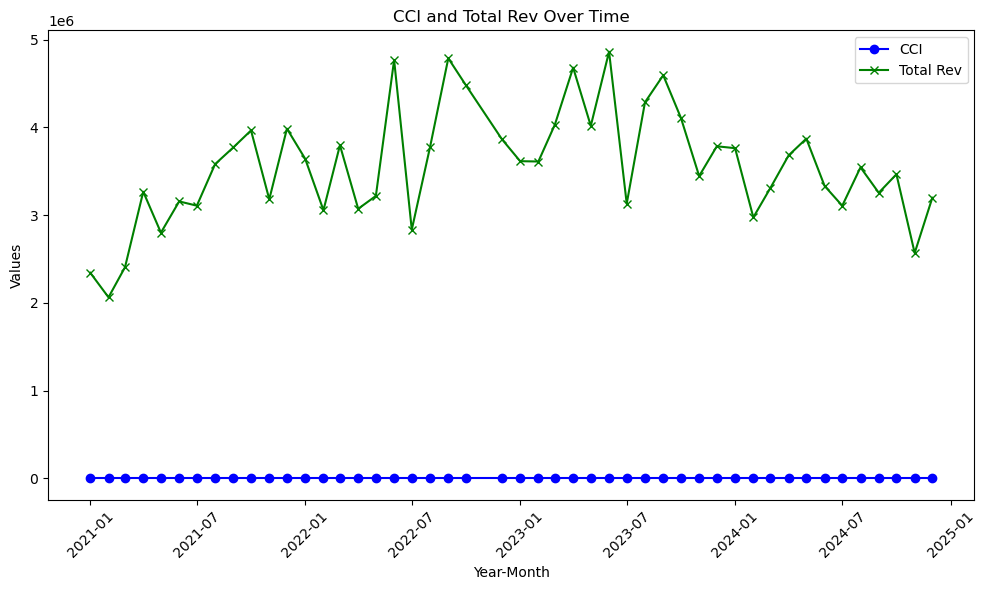

In [20]:
plt.figure(figsize=(10, 6))

# cci line
plt.plot(cci_rev['Year-Month'], cci_rev['CCI'], label='CCI', color='b', marker='o')

# total rev line
plt.plot(cci_rev['Year-Month'], cci_rev['Total Rev'], label='Total Rev', color='g', marker='x')

# labs/title
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.title('CCI and Total Rev Over Time')

#formatting
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
gdp.head()

In [ ]:
rates.head()

In [ ]:
jobs.head()

In [ ]:
fuel.head()

In [ ]:
unemployment.head()